In [127]:
import numpy as np
import matplotlib.pyplot as plt

In [128]:
pi = np.pi
def sample_points(k):#k为对函数a*sin(x+b)在0到2π的采样点数
    a,b = np.random.uniform(0,2,2)
    x = np.arange(0,2*pi,2*pi/k)
    y = a*np.sin(x+b)
    return x,y,a,b
def draw_sin(a,b):
    x = np.arange(0,2*pi,0.1)
    y = a*np.sin(x+b)
    plt.plot(x,y)

In [129]:
task_num = 10   #每个batch中含有的task,即一次梯度下降所含的task数目
points_num =10
alpha = 0.01   #子模型的学习率
beta = 0.01    #元学习初始化参数更新的学习率
a_init = np.random.normal()
b_init = np.random.normal()   #要更新的初始化参数的最初数值
epoch = 10000   #元学习模型更新次数

In [130]:
for epoch_ in range(epoch):
    x_train = []
    y_train = []
    a_train = []
    b_train = []
    # 生成每个task的数据
    for i in range(task_num):
        x,y,a_,b_ = sample_points(points_num)
        x_train.append(x)
        y_train.append(y)
    a_gradient = 0
    b_gradient = 0   
    # 对每个task进行一次梯度下降，更新a,b，更新之后再计算一次梯度，并把这第二次的梯度累加，用来更新a_init和b_init
    loss = 0
    for i in range(task_num):
        a_0 = a_init
        b_0 = b_init   #梯度下降的初始值为元学习模型要学习的初始化的值
        x = x_train[i]
        y = y_train[i]  #第i个task的x和y
        y_ = a_0*np.sin(x+b_0)  #通过参数a,b对y的预测值
        a_0 = a_0 - sum(2*alpha*(y_-y)*np.sin(x+b_0))/points_num #MSE损失，复合函数求导
        b_0 = b_0 - sum(2*alpha*a_0*(y_-y)*np.cos(x+b_0))/points_num
        #更新完后，再计算一次梯度，累加
        y_ = a_0*np.sin(x+b_0)
        loss += sum(np.square(y_-y))/points_num
        a_gradient += sum(2*alpha*(y_-y)*np.sin(x+b_0))/points_num
        b_gradient += sum(2*alpha*a_0*(y_-y)*np.cos(x+b_0))/points_num
    a_init -= beta*a_gradient
    b_init -= beta*b_gradient
    if epoch_%1000==0:
        print("epoch:%d,loss:%f"%(epoch_,loss))

epoch:0,loss:7.613825
epoch:1000,loss:1.811106
epoch:2000,loss:3.949344
epoch:3000,loss:2.326490
epoch:4000,loss:1.799651
epoch:5000,loss:3.036249
epoch:6000,loss:2.961272
epoch:7000,loss:2.693319
epoch:8000,loss:3.840565
epoch:9000,loss:2.571317


### 对MAML学习到的a_init和b_init，进行0次梯度下降更新，直接画出，和新来的采样样本比较

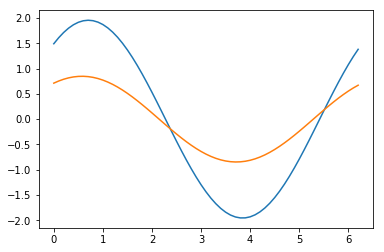

In [131]:
x,y,a_,b_ = sample_points(points_num)
draw_sin(a_,b_)
draw_sin(a_init,b_init)

### MAML学习的初始化参数，迭代1次后

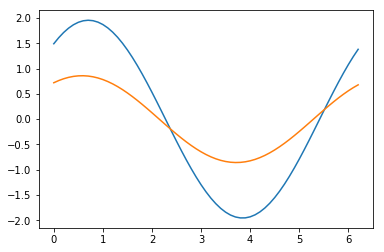

In [132]:
a_0 = a_init
b_0 = b_init   
for i in range(1):    
    y_ = a_0*np.sin(x+b_0)  #通过参数a,b对y的预测值
    a_0 = a_0 - sum(2*alpha*(y_-y)*np.sin(x+b_0))/points_num #MSE损失，复合函数求导
    b_0 = b_0 - sum(2*alpha*a_0*(y_-y)*np.cos(x+b_0))/points_num
draw_sin(a_,b_)
draw_sin(a_0,b_0)

### MAML学习的初始化参数，迭代10次

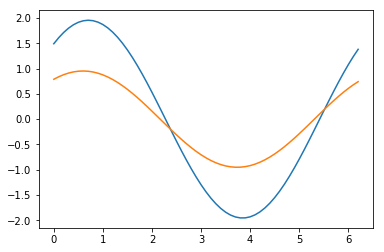

In [133]:
a_0 = a_init
b_0 = b_init   
for i in range(10):
    y_ = a_0*np.sin(x+b_0)  #通过参数a,b对y的预测值
    a_0 = a_0 - sum(2*alpha*(y_-y)*np.sin(x+b_0))/points_num #MSE损失，复合函数求导
    b_0 = b_0 - sum(2*alpha*a_0*(y_-y)*np.cos(x+b_0))/points_num
draw_sin(a_,b_)
draw_sin(a_0,b_0)

### MAML学习的初始化参数，迭代100次

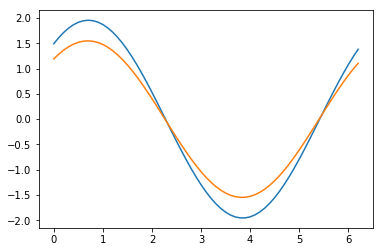

In [134]:
a_0 = a_init
b_0 = b_init   
for i in range(100):
    y_ = a_0*np.sin(x+b_0)  #通过参数a,b对y的预测值
    a_0 = a_0 - sum(2*alpha*(y_-y)*np.sin(x+b_0))/points_num #MSE损失，复合函数求导
    b_0 = b_0 - sum(2*alpha*a_0*(y_-y)*np.cos(x+b_0))/points_num
draw_sin(a_,b_)
draw_sin(a_0,b_0)

### MAML学习的初始化参数，迭代500次

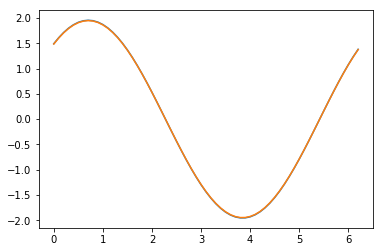

In [135]:
a_0 = a_init
b_0 = b_init   
for i in range(500):
    y_ = a_0*np.sin(x+b_0)  #通过参数a,b对y的预测值
    a_0 = a_0 - sum(2*alpha*(y_-y)*np.sin(x+b_0))/points_num #MSE损失，复合函数求导
    b_0 = b_0 - sum(2*alpha*a_0*(y_-y)*np.cos(x+b_0))/points_num
draw_sin(a_,b_)
draw_sin(a_0,b_0)

### 不进行MAML，随机生成a,b，进行0次梯度下降更新，直接画出，和新来的采样样本比较

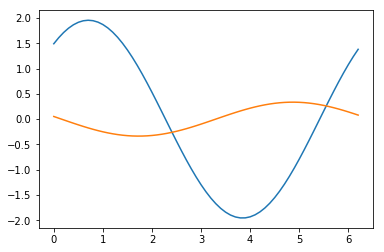

In [137]:
a = np.random.normal()
b = np.random.normal()
draw_sin(a_,b_)
draw_sin(a,b)

### 不进行MAML，随机生成a,b，1次迭代

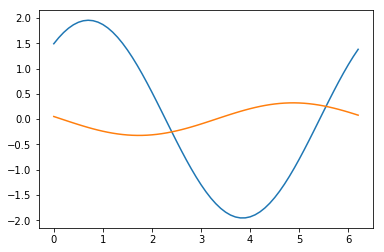

In [138]:
a_0 = a
b_0 = b   
for i in range(1):    
    y_ = a_0*np.sin(x+b_0)  #通过参数a,b对y的预测值
    a_0 = a_0 - sum(2*alpha*(y_-y)*np.sin(x+b_0))/points_num #MSE损失，复合函数求导
    b_0 = b_0 - sum(2*alpha*a_0*(y_-y)*np.cos(x+b_0))/points_num
draw_sin(a_,b_)
draw_sin(a_0,b_0)

### 不进行MAML，随机生成a,b，10次迭代

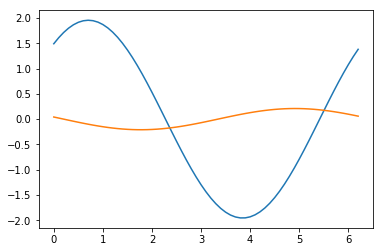

In [139]:
a_0 = a
b_0 = b  
for i in range(10):    
    y_ = a_0*np.sin(x+b_0)  #通过参数a,b对y的预测值
    a_0 = a_0 - sum(2*alpha*(y_-y)*np.sin(x+b_0))/points_num #MSE损失，复合函数求导
    b_0 = b_0 - sum(2*alpha*a_0*(y_-y)*np.cos(x+b_0))/points_num
draw_sin(a_,b_)
draw_sin(a_0,b_0)

### 不进行MAML，随机生成a,b，100次迭代

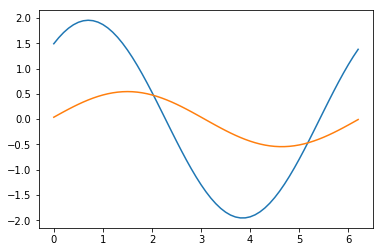

In [140]:
a_0 = a
b_0 = b  
for i in range(100):    
    y_ = a_0*np.sin(x+b_0)  #通过参数a,b对y的预测值
    a_0 = a_0 - sum(2*alpha*(y_-y)*np.sin(x+b_0))/points_num #MSE损失，复合函数求导
    b_0 = b_0 - sum(2*alpha*a_0*(y_-y)*np.cos(x+b_0))/points_num
draw_sin(a_,b_)
draw_sin(a_0,b_0)

### 不进行MAML，随机生成a,b，500次迭代

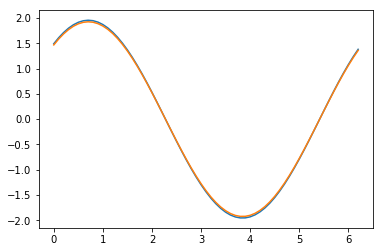

In [141]:
a_0 = a
b_0 = b  
for i in range(500):    
    y_ = a_0*np.sin(x+b_0)  #通过参数a,b对y的预测值
    a_0 = a_0 - sum(2*alpha*(y_-y)*np.sin(x+b_0))/points_num #MSE损失，复合函数求导
    b_0 = b_0 - sum(2*alpha*a_0*(y_-y)*np.cos(x+b_0))/points_num
draw_sin(a_,b_)
draw_sin(a_0,b_0)